In [11]:
#引入資料
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"],
                  columns=boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"], 
                                                    test_size=0.1)

In [16]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)

In [17]:
#fit開始訓練
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

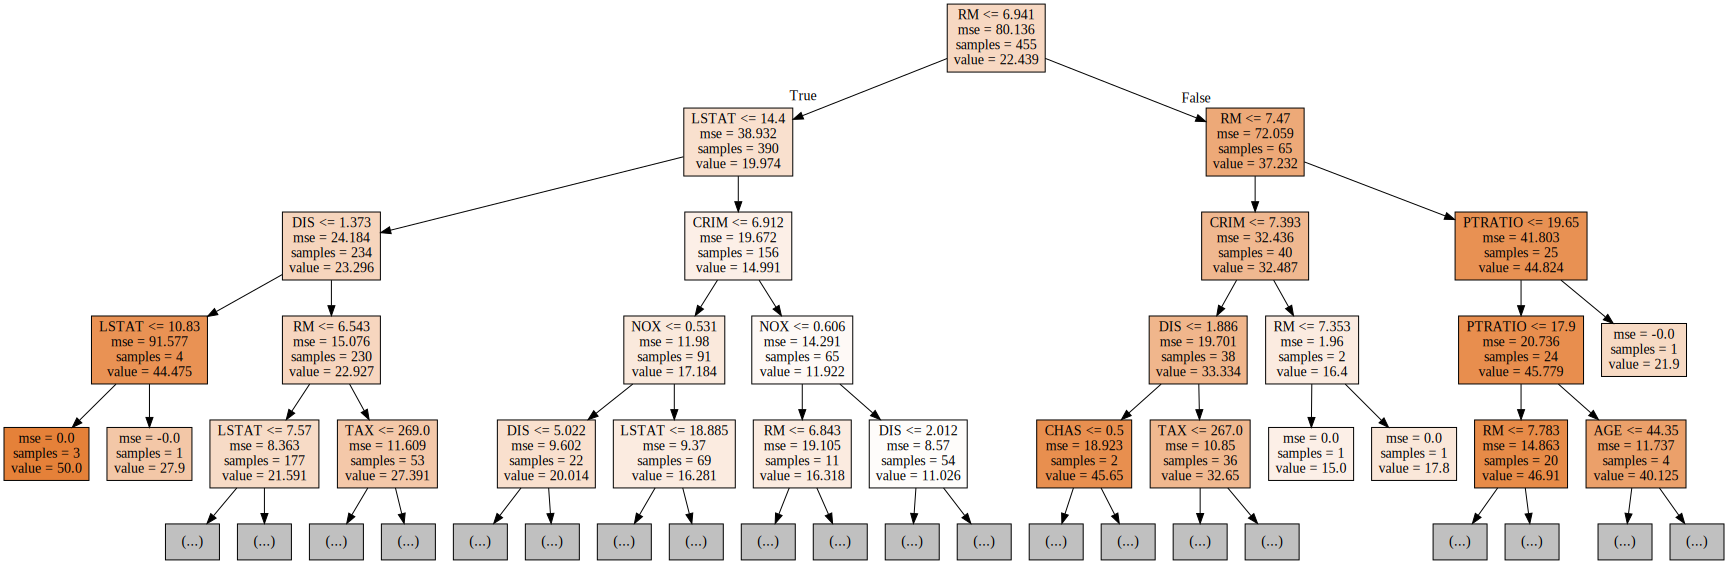

In [19]:
#mse是(第i筆資料數值-平均數值)^2 簡單來說就像是一個圓的半徑大小 越小資料越密集
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, 
                    feature_names=boston["feature_names"],
                    filled=True,
                    max_depth=4)
graphviz.Source(g)

In [20]:
pre = reg.predict(x_test)
pre

array([10.05853659, 43.58      , 10.05853659, 17.3875    , 34.60666667,
       20.96546763, 18.31      , 10.05853659, 15.        , 13.75238095,
       50.        , 10.05853659, 13.75238095, 10.05853659, 15.2       ,
       20.96546763, 48.02      , 31.25238095, 26.04444444, 34.60666667,
       20.96546763, 17.3875    , 31.25238095, 20.96546763, 23.87894737,
       48.02      , 20.96546763, 20.96546763, 23.87894737, 34.60666667,
       13.75238095, 20.96546763, 20.96546763, 10.05853659, 20.96546763,
       23.87894737, 20.96546763, 26.04444444, 34.60666667, 20.96546763,
       23.87894737, 18.31      , 20.96546763, 10.05853659, 17.3875    ,
       10.05853659, 23.87894737, 17.3875    , 10.05853659, 34.60666667,
       20.96546763])

In [21]:
#透過R2的方法去檢驗精準度
from sklearn.metrics import r2_score
print("預測:", pre)
print("正確:", y_test)
print("R2 score", r2_score(y_test, pre))

預測: [10.05853659 43.58       10.05853659 17.3875     34.60666667 20.96546763
 18.31       10.05853659 15.         13.75238095 50.         10.05853659
 13.75238095 10.05853659 15.2        20.96546763 48.02       31.25238095
 26.04444444 34.60666667 20.96546763 17.3875     31.25238095 20.96546763
 23.87894737 48.02       20.96546763 20.96546763 23.87894737 34.60666667
 13.75238095 20.96546763 20.96546763 10.05853659 20.96546763 23.87894737
 20.96546763 26.04444444 34.60666667 20.96546763 23.87894737 18.31
 20.96546763 10.05853659 17.3875     10.05853659 23.87894737 17.3875
 10.05853659 34.60666667 20.96546763]
正確: [ 7.2 50.   7.5 16.7 36.2 22.6 18.5 11.3 10.4 15.7 50.  12.1 19.1  8.4
 20.1 16.8 44.8 36.4 32.  43.5 20.1 15.2 23.9 21.2 24.6 50.  20.1 20.7
 25.2 36.1 13.4 21.7 17.4 15.1 21.1 20.6 26.4 24.8 44.  22.6 29.1 21.7
 21.2 16.7 14.1 12.8 23.8 17.7 15.4 34.7 21. ]
R2 score 0.889495117498711
